<a href="https://colab.research.google.com/github/esradag/pytorch-derin-ogrenme/blob/main/05_PyTorch_Transfer_%C3%96%C4%9Frenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. PyTorch Transfer Öğrenme

> **Not:** Bu notebook, `torchvision`'ın yakında çıkacak [çoklu ağırlık desteği API'sini (`torchvision` v0.13'te gelecek)](https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/) kullanmaktadır.
>
> Haziran 2022 itibariyle, [PyTorch ve `torchvision`'ın gece sürümlerinin yüklenmesi gerekmektedir](https://pytorch.org/get-started/locally/).

Şu ana kadar birkaç model oluşturduk.

Ama bunların performansı pek iyi olmadı.

Belki de şu soruyu soruyorsunuzdur: **Bizim problemimiz için zaten iyi performans gösteren bir model var mı?**

Ve derin öğrenme dünyasında cevabımız çoğunlukla *evet* olur.

Bunu, [**transfer öğrenme**](https://developers.google.com/machine-learning/glossary#transfer-learning) adında güçlü bir teknik kullanarak nasıl yapacağımızı göreceğiz.


## Transfer Öğrenme Nedir?

**Transfer öğrenme**, başka bir modelin başka bir problemeden öğrendiği örüntüleri (ağırlıklar olarak da adlandırılır) alıp, kendi problemimizde kullanmamıza olanak tanır.

Örneğin, bir bilgisayarla görme modelinin [ImageNet](https://www.image-net.org/) gibi veri setlerinden (farklı nesnelerin milyonlarca görüntüsü) öğrendiği örüntüleri alıp, bunları FoodVision Mini modelimizi güçlendirmek için kullanabiliriz.

Veya bir [dil modelinden](https://developers.google.com/machine-learning/glossary#masked-language-model) (dilin bir temsili öğrenmek için büyük miktarda metni okuyan bir model) öğrendiği örüntüleri alıp, bunları farklı metin örneklerini sınıflandıracak bir modelin temeli olarak kullanabiliriz.

Temel mantık şu şekilde kalır: iyi performans gösteren mevcut bir modeli bulun ve onu kendi probleminize uygulayın.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-example-overview.png" alt="transfer öğrenme, farklı problemler üzerinde nasıl uygulanır" width=900/>

*Bilgisayarla görme ve doğal dil işleme (NLP) üzerine transfer öğrenmenin uygulanmasına örnek. Bilgisayarla görme örneğinde, bir bilgisayarla görme modeli, ImageNet'teki milyonlarca görüntü üzerinde örüntüler öğrenebilir ve ardından bu örüntüleri başka bir problemde çıkarım yapmak için kullanabilir. NLP için ise, bir dil modeli, tüm Wikipedia'yı (ve belki de daha fazlasını) okuyarak dilin yapısını öğrenebilir ve ardından bu bilgiyi farklı bir problem için uygulayabilir.*


## Neden Transfer Öğrenme Kullanılır?

Transfer öğrenmenin iki ana faydası vardır:

1. Mevcut bir modelden (genellikle bir sinir ağı mimarisi) yararlanarak, bizimkine benzer problemler üzerinde çalıştığı kanıtlanmış bir çözüm kullanabiliriz.
2. **Zaten öğrenmiş** olduğu örüntülerden yararlanarak, benzer veriler üzerinde öğrenmiş bir modeli kullanabiliriz. Bu genellikle **daha az özel veri ile mükemmel sonuçlar elde edilmesini** sağlar.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-for-foodvision-mini%20.png" alt="FoodVision Mini'ye uygulanan transfer öğrenme" width=900/>

*Bunları FoodVision Mini problemimizde test edeceğiz, ImageNet üzerinde önceden eğitilmiş bir bilgisayarla görme modelini alıp, pizza, biftek ve suşi görüntülerini sınıflandırmak için öğrenilen temel temsillerini kullanmaya çalışacağız.*

Araştırma ve uygulama da transfer öğrenmenin kullanımını desteklemektedir.

Son zamanlarda yapılan bir makine öğrenimi araştırma kağıdında, uygulayıcıların transfer öğrenmeyi mümkün olduğunca kullanmalarını öneren bir bulgu bulunmuştur.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-how-to-train-your-vit-section-6-transfer-learning-highlight.png" width=900 alt="how to train your vision transformer paper section 6, advising to use transfer learning if you can"/>

*Yeni bir çalışmanın, sıfırdan eğitim yapmanın mı yoksa transfer öğrenmenin mi daha iyi olduğunu araştıran bir sonuç, transfer öğrenmenin maliyet ve zaman açısından çok daha faydalı olduğunu bulmuştur. **Kaynak:** [How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers](https://arxiv.org/abs/2106.10270) kağıdının 6. bölümü (sonuç).*

Jeremy Howard (fastai'nin kurucusu) transfer öğrenmenin büyük bir savunucusudur.

> Gerçekten fark yaratan şeyler (transfer öğrenme), transfer öğrenmede daha iyi olabiliyorsak, bu dünyayı değiştiren bir şeydir. Bir anda daha fazla insan, daha az kaynak ve veri ile dünya çapında işler yapabilir. — [Jeremy Howard Lex Fridman Podcast'inde](https://youtu.be/Bi7f1JSSlh8?t=72)


## Önceden Eğitilmiş Modelleri Nerede Bulabilirsiniz?

Derin öğrenme dünyası harika bir yerdir.

O kadar harika ki, dünyanın dört bir yanındaki birçok insan çalışmalarını paylaşıyor.

Çoğu zaman, en son yapılan araştırmalar için kod ve önceden eğitilmiş modeller, yayınlanmasından birkaç gün sonra serbest bırakılır.

Ve kendi problemleriniz için kullanabileceğiniz önceden eğitilmiş modelleri bulabileceğiniz birkaç yer vardır.

| **Konum** | **Neler Var?** | **Link(ler)** |
| ----- | ----- | ----- |
| **PyTorch domain kütüphaneleri** | Her bir PyTorch domain kütüphanesi (`torchvision`, `torchtext`), bazı formdaki önceden eğitilmiş modellere sahiptir. Buradaki modeller PyTorch ile çalışır. | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [`torchtext.models`](https://pytorch.org/text/main/models.html), [`torchaudio.models`](https://pytorch.org/audio/stable/models.html), [`torchrec.models`](https://pytorch.org/torchrec/torchrec.models.html) |
| **HuggingFace Hub** | Dünyadaki organizasyonlardan birçok farklı alan (görsel, metin, ses ve daha fazlası) üzerinde önceden eğitilmiş modeller serisi. Ayrıca pek çok farklı veri seti de mevcut. | https://huggingface.co/models, https://huggingface.co/datasets |
| **`timm` (PyTorch Görüntü Modelleri) kütüphanesi** | PyTorch kodunda, en yeni ve en büyük bilgisayarla görme modellerinin hemen hemen tamamı ve ayrıca pek çok diğer faydalı bilgisayarla görme özellikleri. | https://github.com/rwightman/pytorch-image-models|
| **Paperswithcode** | En son yapılan makine öğrenimi araştırma kağıtlarının ve bu kağıtlara bağlı kod implementasyonlarının bir koleksiyonu. Burada ayrıca farklı görevlerde model performansının karşılaştırmaları da bulunabilir. | https://paperswithcode.com/ |

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-where-to-find-pretrained-models.png" alt="önceden eğitilmiş sinir ağı modellerini bulabileceğiniz farklı yerler" width=900/>

*Yukarıdaki gibi yüksek kaliteli kaynaklara erişimle, her derin öğrenme problemi için başlarken şu soruyu sormak yaygın bir uygulama olmalıdır: "Benim problemim için önceden eğitilmiş bir model var mı?"*

> **Egzersiz:** 5 dakika ayırarak [`torchvision.models`](https://pytorch.org/vision/stable/models.html) ve [HuggingFace Hub Modelleri sayfasını](https://huggingface.co/models) inceleyin, ne buluyorsunuz? (Burada doğru cevaplar yok, sadece keşif yapmayı pratiğe dökmek için)


## Neleri Ele Alacağız

`torchvision.models`'dan önceden eğitilmiş bir modeli alıp, FoodVision Mini problemimizde çalışacak şekilde özelleştireceğiz (ve umarım performansını iyileştireceğiz).

| **Konu** | **İçerik** |
| ----- | ----- |
| **0. Kurulum** | Geçtiğimiz bölümlerde pek çok kullanışlı kod yazdık, bunu indirip tekrar kullanabileceğimizden emin olalım. |
| **1. Veri alımı** | Modelimizin sonuçlarını iyileştirmeye çalışırken kullandığımız pizza, biftek ve suşi görsel sınıflandırma veri setini alalım. |
| **2. Dataset ve DataLoader'lar oluşturma** | Veri yükleyicilerimizi kurmak için 05. bölümde yazdığımız `data_setup.py` betiğini kullanacağız. |
| **3. Önceden eğitilmiş bir model alıp özelleştirme** | Burada, `torchvision.models`'dan bir önceden eğitilmiş model indirecek ve kendi problemimize uyarlayacağız. |
| **4. Modeli eğitme** | Yeni önceden eğitilmiş modelimizin pizza, biftek, suşi veri setimiz üzerinde nasıl performans gösterdiğine bakalım. Önceki bölümde oluşturduğumuz eğitim fonksiyonlarını kullanacağız. |
| **5. Kayıp eğrilerini çizerek modeli değerlendirme** | İlk transfer öğrenme modelimiz nasıl gitti? Aşırı uyum mu yaptı yoksa yetersiz uyum mu sağladı? |
| **6. Test setinden görüntüler üzerinde tahmin yapma** | Bir modelin değerlendirme metriklerine bakmak bir şeydir ama test örnekleri üzerinde tahminlerini görmek başka bir şeydir, hadi *görselleştirelim, görselleştirelim, görselleştirelim*!


## Yardım Nereden Alabilirsiniz?

Bu kursun tüm materyalleri [GitHub'da mevcuttur](https://github.com/mrdbourke/pytorch-deep-learning).

Sorunla karşılaşırsanız, kursun [GitHub Tartışma sayfasında](https://github.com/mrdbourke/pytorch-deep-learning/discussions) bir soru sorabilirsiniz.

Ve tabii ki, [PyTorch belgeleri](https://pytorch.org/docs/stable/index.html) ve [PyTorch geliştirici forumları](https://discuss.pytorch.org/), PyTorch ile ilgili her şey için çok yardımcı bir yerdir.


## 0. Kurulum

Bu bölüme başlamak için gereken modülleri içeri aktaralım/indirelim.

Ekstra kod yazmamızı engellemek için, önceki bölümde ( [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/) ) oluşturduğumuz bazı Python betiklerini (örneğin `data_setup.py` ve `engine.py`) kullanacağız.

Özellikle, [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) dizinini `pytorch-deep-learning` deposundan indireceğiz (eğer zaten indirmediyssek).

Ayrıca, [`torchinfo`](https://github.com/TylerYep/torchinfo) paketini de alacağız, eğer mevcut değilse.

`torchinfo`, daha sonra modelimizin görsel bir temsilini bize sağlamak için yardımcı olacaktır.

> **Not:** Haziran 2022 itibariyle, bu notebook, `torchvision` v0.13+ sürümü gerektiren güncellenmiş çoklu ağırlık API'sini kullanabilmek için `torch` ve `torchvision`'ın gece sürümlerini kullanmaktadır. Bunları aşağıdaki komutla yükleyebilirsiniz.


In [ ]:
# Bu notebook'un güncellenmiş API'lerle çalışabilmesi için, torch 1.12+ ve torchvision 0.13+ gereklidir
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch sürümü 1.12+ olmalıdır"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision sürümü 0.13+ olmalıdır"
    print(f"torch sürümü: {torch.__version__}")
    print(f"torchvision sürümü: {torchvision.__version__}")
except:
    print(f"[BİLGİ] torch/torchvision sürümleri gerekli şekilde değil, gece sürümleri kuruluyor.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch sürümü: {torch.__version__}")
    print(f"torchvision sürümü: {torchvision.__version__}")


[BİLGİ] torch/torchvision sürümleri gerekli şekilde değil, gece sürümleri kuruluyor.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu113
torch sürümü: 2.5.1+cu121
torchvision sürümü: 0.20.1+cu121


In [ ]:
# Normal import işlemlerine devam edelim
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# torchinfo'yu almaya çalış, çalışmazsa yükle
try:
    from torchinfo import summary
except:
    print("[BİLGİ] torchinfo bulunamadı... yükleniyor.")
    !pip install -q torchinfo
    from torchinfo import summary

# going_modular dizinini import etmeye çalış, çalışmazsa GitHub'dan indir
try:
    from going_modular.going_modular import data_setup, engine
except:
    # going_modular betiklerini al
    print("[BİLGİ] going_modular betikleri bulunamadı... GitHub'dan indiriliyor.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine


[BİLGİ] torchinfo bulunamadı... yükleniyor.
[BİLGİ] going_modular betikleri bulunamadı... GitHub'dan indiriliyor.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4393, done.
remote: Counting objects: 100% (1540/1540), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 4393 (delta 1458), reused 1408 (delta 1401), pack-reused 2853 (from 1)
Receiving objects: 100% (4393/4393), 650.73 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (2660/2660), done.
Updating files: 100% (248/248), done.


Şimdi cihaz bağımsız kodumuzu kurmaya başlayalım.

> **Not:** Eğer Google Colab kullanıyorsanız ve henüz bir GPU etkinleştirmediyseniz, şimdi `Çalışma Zamanı -> Çalışma zamanı türünü değiştir -> Donanım hızlandırıcı -> GPU` yoluyla bir GPU etkinleştirmenin zamanı geldi.


In [ ]:
# Cihaz bağımsız kodu kur
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

## 1. Veri Alımı

**Transfer öğrenme**'yi kullanmaya başlamadan önce bir veri setine ihtiyacımız var.

Transfer öğrenmenin, model oluşturma konusundaki önceki denemelerimize nasıl kıyaslandığını görmek için, FoodVision Mini için kullandığımız aynı veri setini indireceğiz.

Kursun GitHub'ından [`pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) veri setini indirmek ve sonra çıkarma işlemi yapmak için biraz kod yazalım.

Ayrıca, veriyi zaten indirmişsek, tekrar indirmediğimizden emin olabiliriz.


In [ ]:
import os
import zipfile

from pathlib import Path

import requests

# Veri klasörü için yolu ayarla
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Eğer görüntü klasörü yoksa, veriyi indirip hazırlayalım...
if image_path.is_dir():
    print(f"{image_path} dizini mevcut.")
else:
    print(f"{image_path} dizini bulunamadı, oluşturuluyor...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Pizza, biftek, suşi verilerini indir
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Pizza, biftek, suşi verileri indiriliyor...")
        f.write(request.content)

    # Pizza, biftek, suşi verilerini çıkar
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Pizza, biftek, suşi verileri çıkarılıyor...")
        zip_ref.extractall(image_path)

    # .zip dosyasını sil
    os.remove(data_path / "pizza_steak_sushi.zip")


data/pizza_steak_sushi dizini bulunamadı, oluşturuluyor...
Pizza, biftek, suşi verileri indiriliyor...
Pizza, biftek, suşi verileri çıkarılıyor...


Mükemmel!

Şimdi daha önce kullandığımız aynı veri setine sahibiz, pizza, biftek ve suşi görüntülerinin bulunduğu standart görüntü sınıflandırma formatında bir dizi.

Şimdi eğitim ve test dizinlerimize giden yolları oluşturalım.


In [ ]:
# Dizinleri Ayarla
train_dir = image_path / "train"
test_dir = image_path / "test"


## 2. Dataset ve DataLoader'lar Oluşturma

`going_modular` dizinini indirdiğimiz için, bölüm [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy)de oluşturduğumuz [`data_setup.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py) betiğini kullanarak DataLoader'larımızı hazırlayıp kurabiliriz.

Ancak, [`torchvision.models`](https://pytorch.org/vision/stable/models.html) üzerinden önceden eğitilmiş bir model kullanacağımız için, önce görüntülerimizi hazırlamak için özel bir dönüşüm yapmamız gerekiyor.


### 2.1 `torchvision.models` için Bir Dönüşüm Oluşturma (manuel oluşturma)

> **Not:** `torchvision` v0.13+ itibariyle, `torchvision.models` kullanarak veri dönüşümleri oluşturma yöntemi güncellenmiştir. Önceki yöntemi "manuel oluşturma" olarak adlandırdım, yeni yöntemi ise "otomatik oluşturma" olarak adlandırdım. Bu notebook her ikisini de göstermektedir.

Önceden eğitilmiş bir model kullanırken, **modelin içine giren özel verinizin, modele giren orijinal eğitim verisiyle aynı şekilde hazırlanması önemlidir**.

`torchvision` v0.13+ öncesinde, `torchvision.models`'da bir önceden eğitilmiş model için dönüşüm oluşturmak için belgelerde şu açıklama yer alıyordu:

> Tüm önceden eğitilmiş modeller, giriş görüntülerinin aynı şekilde normalize edilmesini bekler, yani (3 x H x W) boyutlarında 3 kanal RGB görüntülerinin mini-batch'leri, burada H ve W'nin en az 224 olması beklenir.
>
> Görüntüler `[0, 1]` aralığına yüklenmeli ve ardından `mean = [0.485, 0.456, 0.406]` ve `std = [0.229, 0.224, 0.225]` kullanılarak normalize edilmelidir.
>
> Aşağıdaki dönüşümü normalize etmek için kullanabilirsiniz:
>
> ```
> normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
>                                  std=[0.229, 0.224, 0.225])
> ```

İyi haber şu ki, yukarıdaki dönüşümleri aşağıdaki kombinasyonla elde edebiliriz:

| **Dönüşüm numarası** | **Gerekli dönüşüm** | **Dönüşüm gerçekleştirme kodu** |
| ----- | ----- | ----- |
| 1 | En az 224x224 boyutlarında `[batch_size, 3, height, width]` boyutlarında mini-batch'ler. | `torchvision.transforms.Resize()` ile görüntüleri `[3, 224, 224]` boyutuna yeniden boyutlandırma ve `torch.utils.data.DataLoader()` ile görüntü batch'leri oluşturma. |
| 2 | Değerler 0 ile 1 arasında. | `torchvision.transforms.ToTensor()` |
| 3 | `[0.485, 0.456, 0.406]` ortalaması (her renk kanalı için). | `torchvision.transforms.Normalize(mean=...)` ile görüntülerimizin ortalamasını ayarlama. |
| 4 | `[0.229, 0.224, 0.225]` standart sapması (her renk kanalı için). | `torchvision.transforms.Normalize(std=...)` ile görüntülerimizin standart sapmasını ayarlama. |

> **Not:** ^`torchvision.models`'daki bazı önceden eğitilmiş modeller, `[3, 224, 224]` boyutunda değil, örneğin bazıları `[3, 240, 240]` boyutunda olabilir. Belirli giriş görüntüsü boyutları için dökümantasyona bakın.

> **Soru:** *Ortalama ve standart sapma değerleri nereden geldi? Neden bunu yapmamız gerekiyor?*
>
> Bunlar, verilerden hesaplanmıştır. Özellikle, ImageNet veri setinden, bir görüntü alt kümesi üzerinden ortalama ve standart sapmalar alınarak hesaplanmıştır.
>
> Ayrıca bunu *yapmamıza gerek yok*. Sinir ağları genellikle uygun veri dağılımlarını belirleme konusunda oldukça yeteneklidir (nerede olması gerektiğini kendileri hesaplarlar), ancak bunları baştan ayarlamak, ağlarımızın daha hızlı bir şekilde daha iyi performans göstermesine yardımcı olabilir.

Yukarıdaki adımları gerçekleştirmek için bir dizi `torchvision.transforms` oluşturalım.


In [ ]:
# Manual olarak bir dönüşüm boru hattı oluştur (torchvision < 0.13 için gerekli)
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Tüm görüntüleri 224x224 boyutuna yeniden şekillendir (bazı modeller farklı boyutlar isteyebilir)
    transforms.ToTensor(), # 2. Görüntü değerlerini 0 ile 1 arasında dönüştür
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. [0.485, 0.456, 0.406] ortalaması (her renk kanalı için)
                         std=[0.229, 0.224, 0.225]) # 4. [0.229, 0.224, 0.225] standart sapması (her renk kanalı için),
])


Harika!

Şimdi **manuel olarak oluşturulmuş dönüşümler serisini** kullanarak görüntülerimizi hazırlamaya hazırız, şimdi eğitim ve test DataLoader'larını oluşturalım.

Bunları, [05. PyTorch Going Modular Part 2](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy) bölümünde oluşturduğumuz [`data_setup.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py) betiğinden `create_dataloaders` fonksiyonunu kullanarak oluşturabiliriz.

Modelimizin her seferinde 32 örnekten oluşan mini-batch'ler görmesini sağlamak için `batch_size=32` olarak ayarlayacağız.

Ve görüntülerimizi yukarıda oluşturduğumuz dönüşüm boru hattını kullanarak `transform=simple_transform` ayarını yaparak dönüştürebiliriz.

> **Not:** Bu manuel dönüşüm oluşturmayı bu notebook'a dahil ettim çünkü bu tarzı kullanan kaynaklarla karşılaşabilirsiniz. Ayrıca bu dönüşümler manuel olarak oluşturulduğu için, sonsuz derecede özelleştirilebilir olduklarını unutmamak önemlidir. Yani dönüşüm boru hattınıza veri artırma teknikleri eklemek isterseniz, bunu da yapabilirsiniz.


In [ ]:
# Eğitim ve test DataLoader'larını oluşturun ve sınıf isimlerinin bir listesini alın
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, # yeniden boyutlandırma, görüntüleri 0 ile 1 arasında dönüştürme ve normalize etme
                                                                               batch_size=32) # mini-batch boyutunu 32 olarak ayarla

train_dataloader, test_dataloader, class_names


(<torch.utils.data.dataloader.DataLoader at 0x78157c9bf3d0>,
 ['pizza', 'steak', 'sushi'])

### 2.2 `torchvision.models` için Bir Dönüşüm Oluşturma (otomatik oluşturma)

Daha önce de belirttiğimiz gibi, önceden eğitilmiş bir model kullanırken, **modelin içine giren özel verinizin, modele giren orijinal eğitim verisiyle aynı şekilde hazırlanması önemlidir**.

Yukarıda, bir önceden eğitilmiş model için dönüşümün nasıl manuel olarak oluşturulacağını gördük.

Ancak, `torchvision` v0.13+ itibariyle, otomatik dönüşüm oluşturma özelliği eklenmiştir.

`torchvision.models`'dan bir model kurduğunuzda ve kullanmak istediğiniz önceden eğitilmiş model ağırlıklarını seçtiğinizde, örneğin şöyle diyelim ki:

```python
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT


In [ ]:
# Önceden eğitilmiş model ağırlıklarını al
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = ImageNet üzerinde önceden eğitilmiş en iyi mevcut ağırlıklar
weights


EfficientNet_B0_Weights.IMAGENET1K_V1

Ve şimdi, `weights` ile ilişkili dönüşümlere erişmek için `transforms()` metodunu kullanabiliriz.

Bu, temelde "ImageNet üzerinde `EfficientNet_B0_Weights`'i eğitmek için kullanılan veri dönüşümlerini al" demektir.


In [ ]:
# Önceden eğitilmiş ağırlıklarımızı oluşturmak için kullanılan dönüşümleri al
auto_transforms = weights.transforms()
auto_transforms


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

Görüntülediğinizde, `auto_transforms`'un `manual_transforms`'a çok benzediğini göreceksiniz, tek fark, `auto_transforms`'un seçtiğimiz model mimarisiyle birlikte geldiği, oysa `manual_transforms`'u manuel olarak oluşturmak zorunda kaldık.

`weights.transforms()` aracılığıyla dönüşüm oluşturmanın faydası, **önceden eğitilmiş modelin eğitildiği sırada kullanılan aynı veri dönüşümünü kullandığınızdan emin olmanızdır**.

Ancak, otomatik olarak oluşturulan dönüşümleri kullanmanın dezavantajı, özelleştirme eksikliğidir.

`auto_transforms`'u, tıpkı önceki gibi `create_dataloaders()` ile DataLoader'lar oluşturmak için kullanabiliriz.


In [ ]:
# Eğitim ve test DataLoader'larını oluşturun ve sınıf isimlerinin bir listesini alın
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # Özel verilerimize aynı veri dönüşümlerini uygulayın (önceden eğitilmiş modelle aynı şekilde)
                                                                               batch_size=32) # mini-batch boyutunu 32 olarak ayarla

train_dataloader, test_dataloader, class_names


(<torch.utils.data.dataloader.DataLoader at 0x78157c9d6e10>,
 ['pizza', 'steak', 'sushi'])

## 3. Önceden Eğitilmiş Bir Model Almak

Tamam, işte eğlenceli kısım!

Geçtiğimiz birkaç notebook'ta PyTorch sinir ağlarını sıfırdan oluşturduk.

Ve bu, sahip olunması gereken iyi bir beceri olsa da, modellerimiz istediğimiz gibi performans göstermedi.

İşte burada **transfer öğrenme** devreye giriyor.

Transfer öğrenmenin temel fikri, **zaten sizin probleminize benzer bir problemde iyi performans gösteren bir modeli alıp, ardından onu kendi kullanım durumunuza göre özelleştirmektir**.

Biz bir bilgisayarla görme problemi üzerinde çalışıyoruz (FoodVision Mini ile görüntü sınıflandırma), bu yüzden [`torchvision.models`](https://pytorch.org/vision/stable/models.html#classification) içinde önceden eğitilmiş sınıflandırma modelleri bulabiliriz.

Dökümantasyonu incelediğinizde, şu gibi yaygın bilgisayarla görme mimarisi arka uçlarını bulacaksınız:

| **Mimari Arka Ucu** | **Kod** |
| ----- | ----- |
| [ResNet](https://arxiv.org/abs/1512.03385)'ler | `torchvision.models.resnet18()`, `torchvision.models.resnet50()`... |
| [VGG](https://arxiv.org/abs/1409.1556) (TinyVGG için kullandığımıza benzer) | `torchvision.models.vgg16()` |
| [EfficientNet](https://arxiv.org/abs/1905.11946)'ler | `torchvision.models.efficientnet_b0()`, `torchvision.models.efficientnet_b1()`... |
| [VisionTransformer](https://arxiv.org/abs/2010.11929) (ViT'ler) | `torchvision.models.vit_b_16()`, `torchvision.models.vit_b_32()`... |
| [ConvNeXt](https://arxiv.org/abs/2201.03545) | `torchvision.models.convnext_tiny()`, `torchvision.models.convnext_small()`... |
| `torchvision.models` içinde daha fazlası | `torchvision.models...` |


### 3.1 Hangi Önceden Eğitilmiş Modeli Kullanmalısınız?

Bu, probleminize ve kullandığınız cihaza bağlıdır.

Genel olarak, model adındaki yüksek sayı (örneğin `efficientnet_b0()` -> `efficientnet_b1()` -> `efficientnet_b7()`) *daha iyi performans* ama *daha büyük* bir model anlamına gelir.

Daha iyi performansın *her zaman daha iyi olduğunu* düşünebilirsiniz, değil mi?

Bu doğru ama **bazı daha iyi performans gösteren modeller bazı cihazlar için çok büyük olabilir**.

Örneğin, modelinizi bir mobil cihazda çalıştırmak istiyorsanız, cihazın sınırlı işlem gücünü göz önünde bulundurmanız gerekir, bu yüzden daha küçük bir model arayışında olmalısınız.

Ama eğer sınırsız işlem gücünüz varsa, [*The Bitter Lesson*](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)'da belirtildiği gibi, muhtemelen en büyük, en fazla işlem gücü gerektiren modeli tercih edersiniz.

Bu **performans, hız ve boyut arasındaki dengeyi** anlamak zamanla ve pratikle gelişecektir.

Benim için, `efficientnet_bX` modellerinde güzel bir denge buldum.

Mayıs 2022 itibariyle, [Nutrify](https://nutrify.app) (üzerinde çalıştığım makine öğrenimi destekli uygulama) bir `efficientnet_b0` ile çalışıyor.

[Comma.ai](https://comma.ai/) (açık kaynaklı otonom sürüş yazılımı yapan bir şirket) [bir `efficientnet_b2` kullanıyor](https://geohot.github.io/blog/jekyll/update/2021/10/29/an-architecture-for-life.html) yolun bir temsilini öğrenmek için.

> **Not:** `efficientnet_bX` kullanıyor olsak da, herhangi bir mimariye fazla bağlanmamak önemlidir, çünkü yeni araştırmalar yayınlandıkça bunlar sürekli değişiyor. En iyisi, denemeler yaparak neyin sizin probleminiz için işe yaradığını görmek.


### 3.2 Önceden Eğitilmiş Bir Model Kurma

Kullanacağımız önceden eğitilmiş model [`torchvision.models.efficientnet_b0()`](https://pytorch.org/vision/stable/generated/torchvision.models.efficientnet_b0.html#torchvision.models.efficientnet_b0).

Mimari, *[EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)* başlıklı makaleden alınmıştır.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-effnet-b0-feature-extractor.png" alt="PyTorch torchvision feature extraction modelinden efficientnet_b0" width=900/>

*Oluşturacağımız modelin örneği: `torchvision.models`'dan alınan önceden eğitilmiş bir [`EfficientNet_B0`](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html) modeli, çıktı katmanı pizza, biftek ve suşi görüntüleri sınıflandırmak için özelleştirilmiştir.*

`EfficientNet_B0` önceden eğitilmiş ImageNet ağırlıklarını, dönüşümleri oluşturmak için kullandığımız aynı kodu kullanarak kurabiliriz.

```python
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = ImageNet için mevcut en iyi ağırlıklar


In [ ]:
# ESKİ: Önceden eğitilmiş ağırlıklarla modeli kurun ve hedef cihaza gönderin (torchvision v0.13'ten önceki yöntem)
# model = torchvision.models.efficientnet_b0(pretrained=True).to(device) # ESKİ yöntem (pretrained=True ile)

# YENİ: Önceden eğitilmiş ağırlıklarla modeli kurun ve hedef cihaza gönderin (torchvision v0.13+)
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = mevcut en iyi ağırlıklar
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

#model # çıktı almak için yorumu kaldırın (çok uzun)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 64.2MB/s]


> **Not:** `torchvision`'ın önceki sürümlerinde, önceden eğitilmiş bir modeli şu şekilde oluşturuyordunuz:
>
> `model = torchvision.models.efficientnet_b0(pretrained=True).to(device)`
>
> Ancak, `torchvision` v0.13+ kullanarak bunu çalıştırmak şu gibi hatalara yol açacaktır:
>
> `UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.`
>
> Ve...
>
> `UserWarning: Arguments other than a weight enum or None for weights are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing weights=EfficientNet_B0_Weights.IMAGENET1K_V1. You can also use weights=EfficientNet_B0_Weights.DEFAULT to get the most up-to-date weights.`



Eğer modeli yazdırırsak, aşağıdaki gibi bir şey elde ederiz:

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-v2-effnetb0-model-print-out.png" alt="torchvision.models'dan efficientnet_b0 modelinin yazdırılma çıktısı" width=900/>

Çok çok çok katman.

Bu, transfer öğrenmenin faydalarından biridir; var olan bir modeli alıp, dünyanın en iyi mühendisleri tarafından geliştirilmiş ve kendi probleminize uyguladığınızda elde ettiğiniz fayda.

Bizim `efficientnet_b0` modelimiz üç ana bölümden oluşur:
1. `features` - Görüntü verilerinin temel temsiliyi öğrenmek için kullanılan bir dizi konvolüsyonel katman ve diğer çeşitli aktivasyon katmanları (bu temel temsil/katman koleksiyonu genellikle **özellikler** veya **özellik çıkarıcı** olarak adlandırılır, "modelin temel katmanları görüntülerin farklı **özelliklerini** öğrenir").
2. `avgpool` - `features` katman(lar)ının çıktısının ortalamasını alır ve bunu bir **özellik vektörüne** dönüştürür.
3. `classifier` - **özellik vektörünü**, gerekli çıktı sınıflarının sayısıyla aynı boyutta bir vektöre dönüştürür (çünkü `efficientnet_b0` ImageNet üzerinde önceden eğitilmiş ve ImageNet'in 1000 sınıfı olduğu için, `out_features=1000` varsayılanıdır).


### 3.3 Modelimizin Özeti İçin `torchinfo.summary()` Kullanma

Modelimiz hakkında daha fazla bilgi edinmek için `torchinfo`'nun [`summary()` metodunu](https://github.com/TylerYep/torchinfo#documentation) kullanalım.

Bunu yapmak için şunları geçireceğiz:
 * `model` - özeti almak istediğimiz model.
 * `input_size` - modelimize geçireceğimiz verinin şekli, `efficientnet_b0` için giriş boyutu `(batch_size, 3, 224, 224)`'tür, ancak [diğer `efficientnet_bX` varyantlarının farklı giriş boyutları vardır](https://github.com/pytorch/vision/blob/d2bfd639e46e1c5dc3c177f889dc7750c8d137c7/references/classification/train.py#L92-L93).
    * **Not:** Birçok modern model, [`torch.nn.AdaptiveAvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html) sayesinde farklı boyutlardaki giriş görüntülerini işleyebilir, bu katman verilen bir girişin `output_size`'ını gerektiği şekilde uyarlayarak ayarlar. Bunu `summary()` veya modellerinize farklı boyutlarda giriş görüntüleri geçirerek deneyebilirsiniz.
 * `col_names` - modelimiz hakkında görmek istediğimiz çeşitli bilgi sütunları.
 * `col_width` - özetin sütun genişliği.
 * `row_settings` - bir satırda hangi özelliklerin gösterileceği.


In [ ]:
# `torchinfo` kullanarak bir özet yazdır (gerçek çıktı için yorumu kaldırın)
summary(model=model,
        input_size=(32, 3, 224, 224), # bunun "input_size" olduğundan emin olun, "input_shape" değil
        # col_names=["input_size"], # daha küçük çıktı için yorumu kaldırın
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-unfrozen-layers.png" alt="Bütün katmanları eğitilebilir olarak geçen modelin çıktısı, torchinfo.summary() çıktısı" width=900/>

Vay!

İşte bu büyük bir model!

Özetin çıktısından, görüntü verilerimizin modelden geçerken çeşitli giriş ve çıkış şekli değişimlerini görebiliyoruz.

Ve verilerimizde farklı desenleri tanımak için çok daha fazla toplam parametre (önceden eğitilmiş ağırlıklar) bulunuyor.

Referans olarak, önceki bölümlerdeki modelimiz **TinyVGG'nin 8.083 parametresi varken, `efficientnet_b0`'ın 5.288.548 parametresi var, bu da ~654 kat bir artış!**

Ne düşünüyorsunuz, bu daha iyi performans anlamına mı geliyor?


### 3.4 Temel Modeli Dondurmak ve Çıktı Katmanını İhtiyaçlarımıza Göre Değiştirmek

Transfer öğrenme süreci genellikle şu şekilde işler: bir önceden eğitilmiş modelin bazı temel katmanlarını dondurun (genellikle `features` bölümü) ve ardından çıktı katmanlarını (aynı zamanda başlık/sınıflandırıcı katmanlar olarak da bilinir) ihtiyaçlarınıza göre ayarlayın.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-v2-effnet-changing-the-classifier-head.png" alt="efficientnet sınıflandırıcı başlığını özel çıkış sayısına değiştirme" width=900/>

*Bir önceden eğitilmiş modelin çıktısını, çıktı katmanlarını (veya başlık/sınıflandırıcı katmanlarını) ihtiyaçlarınıza göre değiştirerek özelleştirebilirsiniz. Orijinal `torchvision.models.efficientnet_b0()` modelinin `out_features=1000` vardır çünkü ImageNet'te 1000 sınıf bulunmaktadır, bu modelin eğitildiği veri seti. Ancak, bizim problemimizde pizza, biftek ve suşi görüntülerini sınıflandırmak için yalnızca `out_features=3` gerekir.*

Şimdi `efficientnet_b0` modelimizin `features` bölümündeki tüm katmanları/parametreleri donduralım.

> **Not:** Katmanları *dondurmak*, eğitim sırasında olduğu gibi bırakmak anlamına gelir. Örneğin, modelinizde önceden eğitilmiş katmanlar varsa, onları *dondurmak*, "eğitim sırasında bu katmanlardaki desenleri değiştirme, olduğu gibi bırak" demek anlamına gelir. Esasında, ImageNet'ten öğrendiğimiz önceden eğitilmiş ağırlıkları/desenleri temel alarak, yalnızca çıktı katmanlarını değiştirmek istiyoruz.

`features` bölümündeki tüm katmanları/parametreleri `requires_grad=False` olarak ayarlayarak dondurabiliriz.

`requires_grad=False` olan parametreler için, PyTorch, gradyan güncellemelerini takip etmez ve bu parametreler, eğitim sırasında optimizatörümüz tarafından değiştirilmez.

Esasında, `requires_grad=False` olan bir parametre "eğitilemez" veya "dondurulmuş" olarak kabul edilir.


In [ ]:
# Modelin "features" bölümündeki tüm temel katmanları (özellik çıkarıcı) `requires_grad=False` olarak ayarlayarak dondurun
for param in model.features.parameters():
    param.requires_grad = False


Özellik çıkarıcı katmanları donduruldu!

Şimdi, önceden eğitilmiş modelimizin çıktı katmanını veya `classifier` bölümünü ihtiyaçlarımıza göre ayarlayalım.

Şu anda, önceden eğitilmiş modelimizde `out_features=1000` vardır çünkü ImageNet'te 1000 sınıf bulunmaktadır.

Ancak, bizim 1000 sınıfımız yok, sadece üç sınıfımız var: pizza, biftek ve suşi.

Modelimizin `classifier` bölümünü, yeni bir katman serisi oluşturarak değiştirebiliriz.

Mevcut `classifier` şu katmanlardan oluşmaktadır:

'''
(classifier): Sequential( (0): Dropout(p=0.2, inplace=True) (1): Linear(in_features=1280, out_features=1000, bias=True)
'''

`Dropout` katmanını [`torch.nn.Dropout(p=0.2, inplace=True)`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) kullanarak aynı tutacağız.

> **Not:** [Dropout katmanları](https://developers.google.com/machine-learning/glossary#dropout_regularization), iki sinir ağı katmanı arasındaki bağlantıları `p` olasılığıyla rastgele kaldırır. Örneğin, `p=0.2` ise, sinir ağı katmanları arasındaki bağlantıların %20'si her geçişte rastgele kaldırılır. Bu uygulama, modelin aşırı öğrenmesini (overfitting) engellemeye yardımcı olmak için, kalan bağlantıların, diğer bağlantıların kaldırılmasını telafi edecek özellikler öğrenmesini sağlamaya çalışır (umarım bu kalan özellikler *daha genel* olur).

Ve `Linear` çıktı katmanımız için `in_features=1280` değerini koruyacağız, ancak `out_features` değerini `class_names` listemizin uzunluğuna (yani `len(['pizza', 'steak', 'sushi']) = 3`) değiştireceğiz.

Yeni `classifier` katmanımız, `model` ile aynı cihazda olmalıdır.


In [ ]:
# Manuel tohumları ayarla
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# class_names uzunluğunu al (her sınıf için bir çıktı birimi)
output_shape = len(class_names)

# classifier katmanını yeniden oluştur ve hedef cihaza gönder
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # sınıf sayımız kadar çıktı birimi
                    bias=True)).to(device)


Harika!

Çıktı katmanı güncellendi, şimdi modelimizin başka bir özetini alalım ve nelerin değiştiğine bakalım.


In [ ]:
# Özellikleri dondurduktan ve çıktı sınıflandırıcı katmanını değiştirdikten sonra bir özet yapalım (gerçek çıktı için yorumu kaldırın)
summary(model,
        input_size=(32, 3, 224, 224), # bunun "input_size" olduğundan emin olun, "input_shape" değil (batch_size, renk_kanalları, yükseklik, genişlik)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-frozen-layers.png" alt="Modelimizdeki birden fazla katman dondurulduktan ve sınıflandırıcı başlık değiştirildikten sonraki torchinfo.summary() çıktısı" width=900/>

Ho, ho! Burada birçok değişiklik var!

Hadi bunları inceleyelim:
* **Trainable sütunu** - Temel katmanların (modelin `features` kısmındaki katmanlar) çoğunun `Trainable` değeri `False` olarak görünüyor. Bunun nedeni, bu katmanların `requires_grad=False` olarak ayarlanmış olması. Bunu değiştirmediğimiz sürece, bu katmanlar gelecekteki eğitimde güncellenmeyecek.
* **`classifier` çıktı şekli** - Modelin `classifier` kısmı artık `[32, 3]` çıktı şekline sahip, önceki değeri `[32, 1000]` idi. `Trainable` değeri de `True`. Bu, parametrelerinin eğitim sırasında güncelleneceği anlamına geliyor. Esasında, `features` kısmını, `classifier` kısmına bir görüntünün temel temsiliyi sağlamak için kullanıyoruz ve sonra `classifier` katmanı bu temel temsili, problemimize nasıl uyduğunu öğreniyor.
* **Daha az eğitilebilir parametre** - Önceden 5.288.548 eğitilebilir parametre vardı. Ancak modelin birçok katmanını dondurduğumuz ve yalnızca `classifier` katmanını eğitilebilir bıraktığımız için, şu anda yalnızca 3.843 eğitilebilir parametre var (TinyVGG modelimizden bile daha az). Ancak 4.007.548 eğitilemez parametre de var, bu parametreler, `classifier` katmanımıza girdi olarak verilecek görüntülerin temel temsiliyi oluşturacak.

> **Not:** Bir modelin sahip olduğu eğitilebilir parametre sayısı arttıkça, eğitilmesi için gereken işlem gücü ve süre de artar. Modelimizin temel katmanlarını dondurmak ve daha az eğitilebilir parametre bırakmak, modelimizin hızlı bir şekilde eğitilmesini sağlamalıdır. Bu, transfer öğrenmenin büyük bir avantajıdır; modelin, size benzer bir problem üzerinde eğitilmiş ve öğrenilmiş parametrelerini alıp sadece çıktı katmanlarını hafifçe ayarlayarak probleminize uyarlamaktır.


## 4. Modeli Eğit

Artık yarı dondurulmuş ve özelleştirilmiş bir `classifier`'a sahip bir önceden eğitilmiş modelimiz var, peki ya transfer öğrenmeyi eylemde görmek?

Eğitime başlamak için, bir kayıp fonksiyonu ve bir optimizasyon aracı oluşturalım.

Çünkü hala çok sınıflı sınıflandırma üzerinde çalışıyoruz, kayıp fonksiyonu olarak `nn.CrossEntropyLoss()` kullanacağız.

Ve optimizasyon aracı olarak `torch.optim.Adam()` ile `lr=0.001`'i kullanmaya devam edeceğiz.


In [ ]:
# Kayıp fonksiyonunu ve optimizasyon aracını tanımla
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Harika!

Modelimizi eğitmek için, [05. PyTorch Going Modular bölüm 04](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them)'de tanımladığımız `train()` fonksiyonunu kullanabiliriz.

`train()` fonksiyonu, [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) dosyasının içinde yer alır ve [`going_modular` dizininde](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular/going_modular) bulunmaktadır.

Modelimizi 5 epoch boyunca eğitmek ne kadar zaman alacak, bir bakalım.

> **Not:** Burada yalnızca `classifier` parametrelerini eğiteceğiz çünkü modelimizdeki diğer tüm parametreler dondurulmuş durumda.


In [ ]:
# Rastgele tohumları ayarla
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Zamanlayıcıyı başlat
from timeit import default_timer as timer
start_time = timer()

# Eğitim ayarlarını yap ve sonuçları kaydet
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# Zamanlayıcıyı durdur ve geçen süreyi yazdır
end_time = timer()
print(f"[INFO] Toplam eğitim süresi: {end_time-start_time:.3f} saniye")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0966 | train_acc: 0.3867 | test_loss: 0.8843 | test_acc: 0.6828
Epoch: 2 | train_loss: 0.9192 | train_acc: 0.6523 | test_loss: 0.7914 | test_acc: 0.8258
Epoch: 3 | train_loss: 0.7542 | train_acc: 0.8711 | test_loss: 0.6483 | test_acc: 0.9167
Epoch: 4 | train_loss: 0.7378 | train_acc: 0.7109 | test_loss: 0.5965 | test_acc: 0.8958
Epoch: 5 | train_loss: 0.6268 | train_acc: 0.7617 | test_loss: 0.6127 | test_acc: 0.8968
[INFO] Toplam eğitim süresi: 167.121 saniye


Vay!

Modelimiz oldukça hızlı bir şekilde eğitildi (~5 saniye benim yerel makinemde [NVIDIA TITAN RTX GPU](https://www.nvidia.com/en-au/deep-learning-ai/products/titan-rtx/)/yaklaşık 15 saniye Google Colab'de [NVIDIA P100 GPU](https://www.nvidia.com/en-au/data-center/tesla-p100/) ile).

Ve görünüyor ki, önceki model sonuçlarımızı oldukça aştık!

Bir `efficientnet_b0` omurgası ile modelimiz, test veri setinde %85'in üzerinde doğruluk sağlıyor, bu da TinyVGG ile elde edebildiğimizin neredeyse *iki katı*.

Birkaç satır kodla indirdiğimiz bir model için fena değil.


## 5. Modeli değerlendirme: Kayıp eğrilerini çizme

Modelimiz oldukça iyi performans gösteriyor gibi görünüyor.

Eğitimin zaman içindeki görünümünü görmek için kayıp eğrilerini çizelim.

Kayıp eğrilerini, [04. PyTorch Custom Datasets bölüm 7.8](https://www.learnpytorch.io/04_pytorch_custom_datasets/#78-plot-the-loss-curves-of-model-0)'de oluşturduğumuz `plot_loss_curves()` fonksiyonu ile çizebiliriz.

Bu fonksiyon, [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) dosyasının içinde yer alır, bu yüzden fonksiyonu içeri aktarmayı deneyelim ve dosyamız yoksa indirip alalım.


[INFO] helper_functions.py dosyası bulunamadı, indiriliyor...


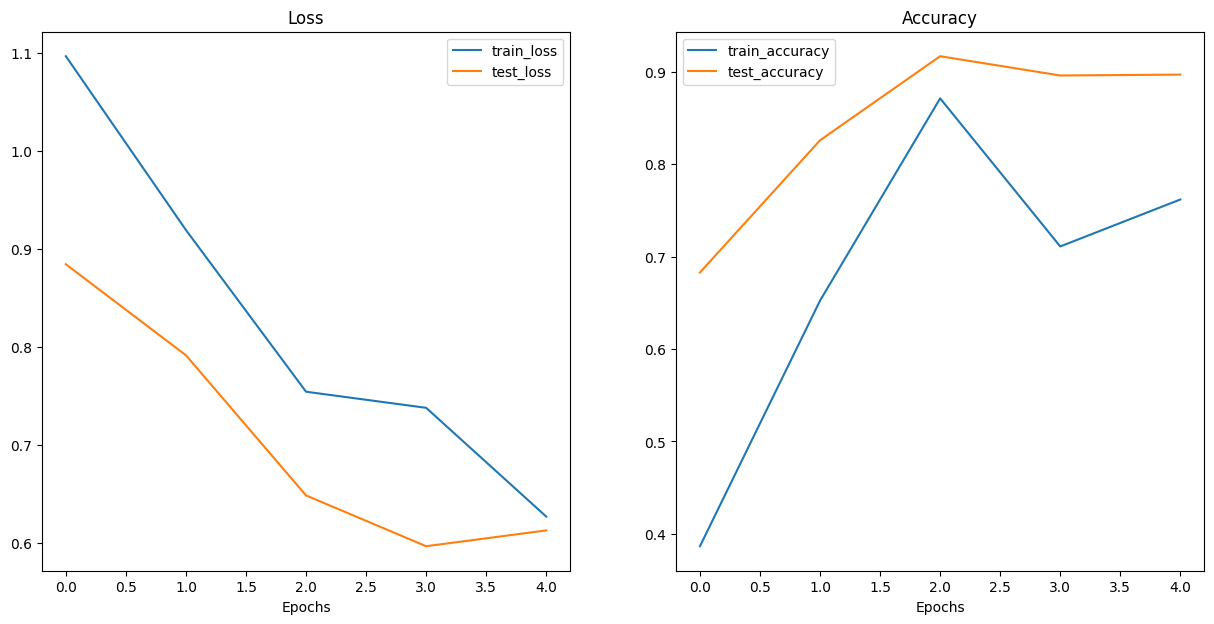

In [ ]:
# plot_loss_curves() fonksiyonunu helper_functions.py dosyasından al, dosyayı bulamazsak indir
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] helper_functions.py dosyası bulunamadı, indiriliyor...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Modelimizin kayıp eğrilerini çiz
plot_loss_curves(results)


Bunlar mükemmel görünen kayıp eğrileri!

Her iki veri kümesi için (eğitim ve test) kayıp değerlerinin doğru yöne doğru gittiği görünüyor.

Aynı şekilde doğruluk değerleri de yukarıya doğru bir trend izliyor.

Bu, **transfer öğrenme** gücünü gösteriyor. Önceden eğitilmiş bir model kullanmak, genellikle küçük bir veriyle ve daha kısa sürede oldukça iyi sonuçlar verir.

Peki ya modeli daha uzun süre eğitmeye çalışsak ne olur? Veya daha fazla veri eklesek?

> **Soru:** Kayıp eğrilerine bakarak, modelimiz aşırı öğrenme (overfitting) mi yapıyor yoksa eksik öğrenme (underfitting) mi? Yoksa belki de hiçbiri değil mi? İpucu: Fikirler için [04. PyTorch Custom Datasets bölüm 8. İdeal bir kayıp eğrisinin nasıl olması gerektiğine](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like) bakın.


## 6. Test setinden görüntülerle tahmin yap

Modelimizin nicel olarak iyi performans gösterdiğini görüyoruz, ancak ya nitel olarak?

Bunu öğrenmek için, modelimizle test setinden (eğitim sırasında görülmeyen) bazı görüntüler üzerinde tahminler yapalım ve bunları çizelim.

*Görselleştirme, görselleştirme, görselleştirme!*

Unutmamamız gereken bir şey, modelimizin bir görüntü üzerinde tahmin yapabilmesi için, görüntünün **modelin eğitildiği** formatta olması gerektiğidir.

Bu, görüntülerimizin aşağıdaki gereksinimlere sahip olmasını sağlamamız gerektiği anlamına gelir:
* **Aynı şekil** - Eğer görüntülerimiz, modelimizin eğitildiği şekilden farklıysa, şekil hataları alırız.
* **Aynı veri tipi** - Eğer görüntülerimiz farklı bir veri tipindeyse (örneğin `torch.int8` vs. `torch.float32`), veri tipi hataları alırız.
* **Aynı cihaz** - Eğer görüntülerimiz, modelimizden farklı bir cihazda ise, cihaz hataları alırız.
* **Aynı dönüşümler** - Eğer modelimiz, belirli bir ortalama ve standart sapma ile normalize edilen görüntülerle eğitildiyse ve biz farklı bir şekilde dönüştürülmüş görüntülerle tahmin yapmaya çalışırsak, bu tahminler yanlış olabilir.

> **Not:** Bu gereksinimler, eğitimli bir modelle tahmin yapmaya çalışırken tüm veri türleri için geçerlidir. Tahmin yapmak istediğiniz veriler, modelinizin eğitildiği formatta olmalıdır.

Bunların hepsini yapmak için, şu adımları gerçekleştirecek bir `pred_and_plot_image()` fonksiyonu oluşturacağız:

1. Eğitilmiş bir modeli, bir sınıf adı listesi, bir hedef görüntü dosya yolu, bir görüntü boyutu, bir dönüşüm ve bir hedef cihaz alır.
2. Görüntüyü [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) ile açar.
3. Görüntü için bir dönüşüm oluşturur (bu, yukarıda oluşturduğumuz `manual_transforms`'a varsayılan olarak ayarlanabilir veya `weights.transforms()` ile oluşturulmuş bir dönüşüm kullanılabilir).
4. Modelin hedef cihazda olduğundan emin olur.
5. `model.eval()` ile modelin değerlendirme modunu açar (bu, `nn.Dropout()` gibi katmanları kapatır, böylece bunlar çıkarım için kullanılmaz) ve çıkarım modunu başlatan bir context manager kullanır.
6. Adım 3'te oluşturulan dönüşümle hedef görüntüsünü dönüştürür ve `torch.unsqueeze(dim=0)` ile ekstra bir batch boyutu ekler, böylece giriş görüntüsünün şekli `[batch_size, color_channels, height, width]` olur.
7. Görüntüye tahmin yaparak modelin içine veririz, görüntünün hedef cihazda olduğundan emin olarak.
8. Modelin çıktısı olan logits'i, `torch.softmax()` ile tahmin olasılıklarına dönüştürür.
9. Modelin tahmin olasılıklarını, `torch.argmax()` ile tahmin etiketlerine dönüştürür.
10. Görüntüyü `matplotlib` ile çizeriz ve başlık olarak adım 9'dan tahmin etiketini ve adım 8'den tahmin olasılığını ayarlarız.

> **Not:** Bu, [04. PyTorch Custom Datasets bölüm 11.3'teki](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function) `pred_and_plot_image()` fonksiyonuna benzer bir fonksiyondur, ancak bazı adımlar değiştirilmiştir.


In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Eğitilmiş bir modeli, sınıf adlarını, görüntü dosya yolunu, görüntü boyutunu, dönüşümü ve hedef cihazı al
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Görüntüyü aç
    img = Image.open(image_path)

    # 3. Görüntü için dönüşüm oluştur (eğer bir dönüşüm yoksa)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Görüntü üzerinde tahmin yap ###

    # 4. Modelin hedef cihazda olduğundan emin ol
    model.to(device)

    # 5. Modeli değerlendirme moduna ve çıkarım moduna al
    model.eval()
    with torch.inference_mode():
      # 6. Görüntüyü dönüştür ve ekstra bir boyut ekle (model, örnekleri [batch_size, color_channels, height, width] şeklinde ister)
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Görüntü üzerinde tahmin yap ve hedef cihazına gönder
      target_image_pred = model(transformed_image.to(device))

    # 8. Logitleri -> tahmin olasılıklarına dönüştür (çok sınıflı sınıflandırma için torch.softmax() kullan)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Tahmin olasılıklarını -> tahmin etiketlerine dönüştür
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Görüntüyü tahmin edilen etiket ve olasılık ile çiz
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);


Ne güzel bir işlev!

Şimdi, bunu test etmek için test setindeki birkaç rastgele görüntü üzerinde tahmin yapalım.

Test görüntülerinin tüm yollarını almak için `list(Path(test_dir).glob("*/*.jpg"))` kullanabiliriz. `glob()` metodundaki yıldızlar, "bu desenle eşleşen herhangi bir dosya" anlamına gelir, yani `.jpg` ile biten her dosya (tüm görüntülerimiz).

Ve ardından Python'un [`random.sample(population, k)`](https://docs.python.org/3/library/random.html#random.sample) fonksiyonu ile bunlardan rastgele örnekler alabiliriz. Burada `population` örneklemeyi yapacağımız dizidir ve `k` kaç örnek almak istediğimizi belirtir.


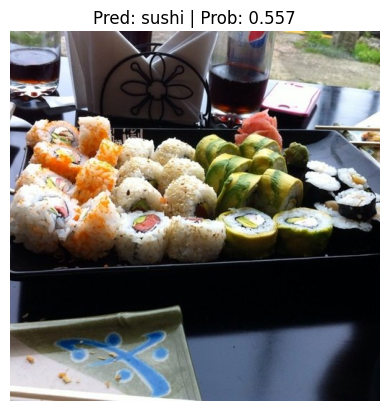

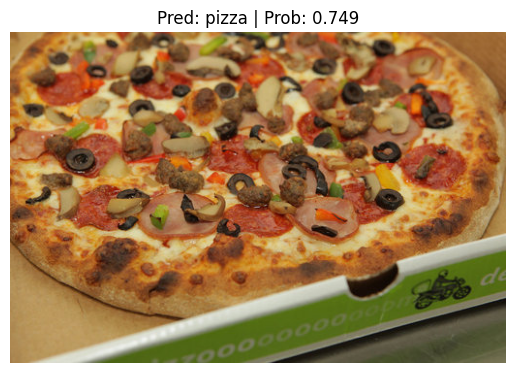

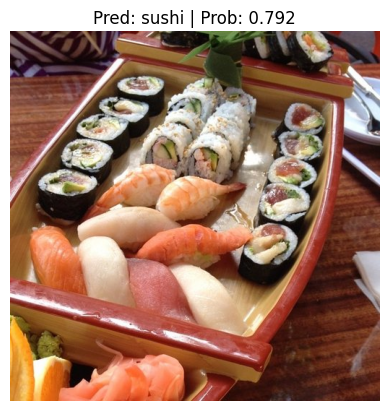

In [ ]:
# Test setinden rastgele bir görüntü yolu listesi al
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # test verisindeki tüm görüntü yollarını al
test_image_path_sample = random.sample(population=test_image_path_list, # tüm test görüntü yolları arasından seç
                                       k=num_images_to_plot) # rastgele 'k' kadar görüntü yolu seç

# Görüntüler üzerinde tahmin yap ve çiz
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # isteğe bağlı olarak önceden eğitilmiş model ağırlıklarımızdan belirli bir dönüşüm verilebilir
                        image_size=(224, 224))


### 6.1 Kendi özel görüntümüz üzerinde tahmin yapma

Görünüşe göre modelimiz, test setinden gelen verilerde niteliksel olarak iyi sonuçlar veriyor.

Ama ya kendi özel görüntümüzde?

İşte makine öğrenmesinin gerçek eğlencesi burada başlıyor!

Eğitim veya test seti dışında kendi veriniz üzerinde tahmin yapmak.

Modelimizi özel bir görüntü üzerinde test etmek için, eski dostumuz `pizza-dad.jpeg` görüntüsünü (babamın pizza yerken çekilmiş bir resmi) içeri aktaralım.

Ardından bunu, yukarıda oluşturduğumuz `pred_and_plot_image()` fonksiyonumuza verip ne olduğunu görelim.


data/04-pizza-dad.jpeg indiriliyor...


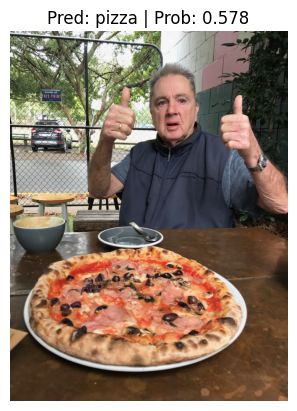

In [ ]:
# Özel görüntüyü indir
import requests

# Özel görüntü yolu ayarla
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Görüntü zaten varsa indirme, yoksa indir
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # GitHub'dan indirirken "raw" dosya bağlantısını kullanmamız gerekiyor
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"{custom_image_path} indiriliyor...")
        f.write(request.content)
else:
    print(f"{custom_image_path} zaten mevcut, indirme atlanıyor.")

# Özel görüntü üzerinde tahmin yap
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)


İki parmak yukarı!

Görünüşe göre modelimiz yine doğru tahminde bulundu!

Ama bu sefer tahmin olasılığı, TinyVGG modelindeki (`0.373`) tahmin olasılığından daha yüksek. [04. PyTorch Custom Datasets bölüm 11.3](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function)deki.

Bu, `efficientnet_b0` modelimizin *daha fazla* kendine güvenerek tahminde bulunduğunu gösteriyor, oysa TinyVGG modelimiz sadece tahmin yapıyordu.
